# ASTU Assignment

## BY-
### SUNNY KARMAKAR- (170310007051)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATASET loading

In [46]:
data = pd.read_csv("PCA_practice_dataset.csv",header=None)

In [47]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,...,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,...,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,...,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,...,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,...,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


### Covariance matrix of data

In [48]:
cov = np.cov(data)

In [49]:
cov.shape

(8042, 8042)

### Eigenvalues and Eigenvectors of covariance matrix

In [50]:
e_val,e_vec = np.linalg.eig(cov)

In [51]:
e_val.shape

(8042,)

In [52]:
eig_vec_ls = []
for i in range(e_vec.shape[1]):
    e = np.matrix(data).T@e_vec[:,i]
    e = e/e_val[i]
    eig_vec_ls.append(np.ravel(e))

## Principal Components

In [22]:
sort_index = np.argsort(e_val)
t_val = np.arange(0.9,0.98,0.01)
t_val = t_val.round(2)
sort_index = sort_index[::-1]
e_val_sum = np.sum(e_val)
temp_sum=0
prin_e_val=[]
prin_e_vec=[]
t=0.9
i=0
prin_comp=[]
while t<0.98:
    while temp_sum<t*e_val_sum :
        prin_e_val.append(e_val[sort_index[i]])
        prin_e_vec.append(eig_vec_ls[sort_index[i]])
        temp_sum += e_val[sort_index[i]]
        i += 1
    prin_comp.append(i)
    t+=0.01

In [53]:
prin_comp

[4, 5, 5, 6, 6, 7, 7, 9]

In [55]:
for i in range(len(t_val)):
    print("Number of principal components at threshold {} is {}".format(t_val[i],prin_comp[i]))

Number of principal components at threshold 0.9 is 4
Number of principal components at threshold 0.91 is 5
Number of principal components at threshold 0.92 is 5
Number of principal components at threshold 0.93 is 6
Number of principal components at threshold 0.94 is 6
Number of principal components at threshold 0.95 is 7
Number of principal components at threshold 0.96 is 7
Number of principal components at threshold 0.97 is 9


# Scree Plot

Plotting number of principal components against threshold values

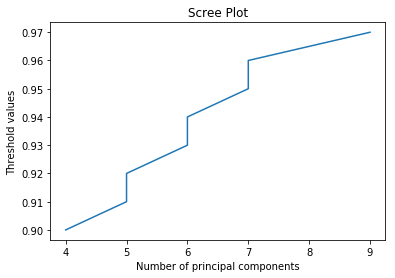

In [56]:
plt.plot(prin_comp,t_val)
plt.title("Scree Plot")
plt.xlabel("Number of principal components")
plt.ylabel("Threshold values")
plt.show()